In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
summary = pd.read_csv('atussum_2013.dat')
summary.head()


,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
summary.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=413)

In [5]:
new_data = summary[["tucaseid", "TUFINLWGT","TESEX", "TEAGE", "t120302"]]

Redefining column names

In [6]:
new_data = new_data.rename(columns={"tucaseid": "Case_id", "TUFINLWGT": "Weight", "TESEX": "Gender", "TEAGE" : "Age", "t120302": "Tobacco__Drug_Use"})

In [7]:
new_data.head()

,Case_id,Weight,Gender,Age,Tobacco__Drug_Use
0,20130101130004,11899905.662034,2,22,0
1,20130101130112,4447638.009513,1,39,0
2,20130101130123,10377056.507734,2,47,0
3,20130101130611,7731257.992805,2,50,0
4,20130101130616,4725269.227067,2,45,0


In [8]:
real_data = new_data[['Case_id','Weight', 'Gender', 'Age', 'Tobacco__Drug_Use']]



In [9]:
clean_data = real_data[real_data.Tobacco__Drug_Use > 0]
clean_data.Age.min()
clean_data.Age.max()
#I want all values that are greater than 0
#I wanted to know the range of ages for those who had more than 0 minutes of tobacco and drug use per day. 

80

In [10]:

clean_data['Weighted_Minutes'] = clean_data.Weight * clean_data.Tobacco__Drug_Use
weighted_average = clean_data.Weighted_Minutes.sum() / clean_data.Weight.sum()
weighted_average

/Users/pnitto/iron_yard/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


22.116807244441901

Weighted Average for Tobacco and Drug Use

In [11]:
unweighted_average = clean_data.Tobacco__Drug_Use.sum() / len(clean_data.Tobacco__Drug_Use)
unweighted_average

25.368794326241133

Unweighted Average for Tobacco and Drug Use

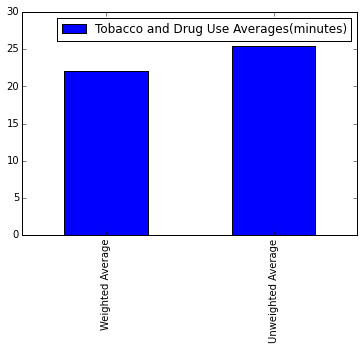

In [12]:
averages = [weighted_average, unweighted_average]
index1 = ['Weighted Average','Unweighted Average']
both_averages = pd.Series(averages, index=index1)
both_averages.name = 'Tobacco and Drug Use Averages(minutes)'
both_averages.to_frame().plot(kind='bar')



This bar graph shows the weighted and unweighted averages of Tobacco and Drug Use for both male and females ages 16 through 80. The approximate weighted average is 22.12 minutes per day of Tobacco and Drug Use.  The approximate unweighted average is 25.37 minutes per day of Tobacco and Drug Use. Based on this group of respondents, we can conclude that the respondents that answered more questions to the survey spent less of their time a day using tobacco and drugs than respondents who did not answer as many questions.

,Case_id,Weight,Gender,Age,Tobacco__Drug_Use,Weighted_Minutes
6641,20130706132269,15730733.344123,2,16,5,7.865367e+07
6983,20130806130958,4573647.022275,1,18,98,4.482174e+08
5405,20130605131341,9828291.745606,1,19,20,1.965658e+08
5594,20130605131856,7587461.538383,2,21,5,3.793731e+07
7896,20130907131998,20941446.986026,1,22,5,1.047072e+08


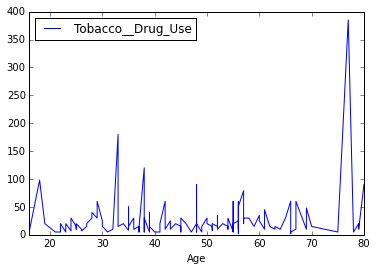

In [13]:
sorted_age_data = clean_data.sort_index(ascending=True, by=['Age'])
sorted_age_data.plot(kind='line',x='Age', y='Tobacco__Drug_Use')
sorted_age_data.head()

This line-graph shows males and females tobacco and drug use per minute per day based on age. Based on this information alone, we can not differentiate between how much time was allocated towards tobacco use and drug use. This category groups both together.  It is unclear what is meant by drug use. We do not know if this category includes illegal drug use, or legal drug use(medication). Respondents in the age range of 75 to 80, have the highest amount of time spent per day using tobacco and drugs. Respondents between the ages of 30 and 40, have the second highest amount of time spent per day using tobacco and drugs. It is surprising that respondents less than 18 years old have such a high amount of time spent using tobacco and drugs. Tobacco can only legally be purchased by someone who is at least 18 years old. 


In [14]:
sorted_age_data.head()

,Case_id,Weight,Gender,Age,Tobacco__Drug_Use,Weighted_Minutes
6641,20130706132269,15730733.344123,2,16,5,7.865367e+07
6983,20130806130958,4573647.022275,1,18,98,4.482174e+08
5405,20130605131341,9828291.745606,1,19,20,1.965658e+08
5594,20130605131856,7587461.538383,2,21,5,3.793731e+07
7896,20130907131998,20941446.986026,1,22,5,1.047072e+08


I want to look at the weighted average of minutes spent using tobacco and drugs in 8 different age ranges from 16 to 80 years old.

##Age Range 16 - 24

In [18]:
ages_16_above = sorted_age_data.Age >= 16
ages_24_less = sorted_age_data.Age <= 24

ages_16_thru_24 = sorted_age_data[ages_16_above & ages_24_less]
ages_16_thru_24

def average_minutes_16_24():
    return ages_16_thru_24.Weighted_Minutes.sum() / ages_16_thru_24.Weight.sum()

average_16_thru_24 = average_minutes_16_24()
average_16_thru_24



16.215508789041831

##Age Range 25 - 33

In [19]:
ages_25_above = sorted_age_data.Age >= 25
ages_33_less = sorted_age_data.Age <= 33
ages_25_thru_33 = sorted_age_data[ages_25_above & ages_33_less]
ages_25_thru_33

def average_minutes_25_33():
    return ages_25_thru_33.Weighted_Minutes.sum() / ages_25_thru_33.Weight.sum()

average_25_33 = average_minutes_25_33()
average_25_33

22.693085661116601

##Age Range 34 - 42

In [20]:
ages_34_above = sorted_age_data.Age >= 34
ages_42_less = sorted_age_data.Age <= 42
ages_34_thru_42 = sorted_age_data[ages_34_above & ages_42_less]
ages_34_thru_42

def average_minutes_34_42():
    return ages_34_thru_42.Weighted_Minutes.sum() / ages_34_thru_42.Weight.sum()

average_34_42 = average_minutes_34_42()
average_34_42

19.199097092492444

##Age Range 43 - 51

In [21]:
ages_43_above = sorted_age_data.Age >= 43
ages_51_less = sorted_age_data.Age <= 51
ages_43_thru_51 = sorted_age_data[ages_43_above & ages_51_less]
ages_43_thru_51

def average_minutes_43_51():
    return ages_43_thru_51.Weighted_Minutes.sum() / ages_43_thru_51.Weight.sum()

average_43_51 = average_minutes_43_51()
average_43_51

19.334700082144561

##Age Range 52 - 60

In [22]:
ages_52_above = sorted_age_data.Age >= 52
ages_60_less = sorted_age_data.Age <= 60
ages_52_thru_60 = sorted_age_data[ages_52_above & ages_60_less]
ages_52_thru_60

def average_minutes_52_60():
    return ages_52_thru_60.Weighted_Minutes.sum() / ages_52_thru_60.Weight.sum()

average_52_60 = average_minutes_52_60()
average_52_60

19.790336196833557

## Age range 61 - 69

In [23]:
ages_61_above = sorted_age_data.Age >= 61
ages_69_less = sorted_age_data.Age <= 69
ages_61_thru_69 = sorted_age_data[ages_61_above & ages_69_less]
ages_61_thru_69

def average_minutes_61_69():
    return ages_61_thru_69.Weighted_Minutes.sum() / ages_61_thru_69.Weight.sum()

average_61_69 = average_minutes_61_69()
average_61_69

21.653373582415274

##Age range 70 - 78

In [24]:
ages_70_above = sorted_age_data.Age >= 70
ages_78_less = sorted_age_data.Age <= 78
ages_70_thru_78 = sorted_age_data[ages_70_above & ages_78_less]
ages_70_thru_78

def average_minutes_70_78():
    return ages_70_thru_78.Weighted_Minutes.sum() / ages_70_thru_78.Weight.sum()

average_70_78 = average_minutes_70_78()
average_70_78

94.55379732310989

## Age Range 79 - 87

In [25]:
ages_79_above = sorted_age_data.Age >= 79
ages_87_less = sorted_age_data.Age <= 87
ages_79_thru_87 = sorted_age_data[ages_79_above & ages_87_less]
ages_79_thru_87

def average_minutes_79_87():
    return ages_79_thru_87.Weighted_Minutes.sum() / ages_79_thru_87.Weight.sum()

average_79_87 = average_minutes_79_87()
average_79_87

19.646172688230575

##Pie chart of weighted average minutes of tobacco and drug use per age group.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1059ab6a0>], dtype=object)

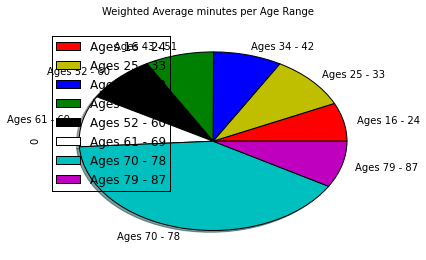

In [26]:
age_averages = [average_16_thru_24,
                average_25_33, 
                average_34_42,
                average_43_51,
                average_52_60,
                average_61_69,
                average_70_78,
                average_79_87
               ]
index2 = ['Ages 16 - 24',
          'Ages 25 - 33', 
          'Ages 34 - 42', 
          'Ages 43 - 51', 
          'Ages 52 - 60', 
          'Ages 61 - 69', 
          'Ages 70 - 78', 
          'Ages 79 - 87'
         ]
averages_by_age = pd.Series(age_averages, index=index2)
averages_by_age.to_frame().plot(kind='pie', legend=4, title='Weighted Average minutes per Age Range', shadow=True, colors=['r','y','b','g','k','w','c','m'], subplots=True)




This pie chart illustrates the weighted average in minutes per age group. The age group of 70 - 80, has the highest weighted average of time spent using tobacco and drugs. It is interesting that this group would have the highest average of minutes spent using tobacco and drugs. In general, older respondents will most likely be taking more medication for health related issues then younger respondents. The other age ranges appear to have a similar amount of time spent using tobacco and drugs. 

##The data frame below shows Tobacco and Drug Use sorted by gender. 

In [27]:
men_women_tobacco = sorted_age_data[['Gender', 'Weight', 'Tobacco__Drug_Use', 'Age','Weighted_Minutes']]
sorted_men_women = men_women_tobacco.sort_index(ascending=True, by='Gender')
sorted_men_women.head()

,Gender,Weight,Tobacco__Drug_Use,Age,Weighted_Minutes
4203,1,2294518.311576,90,80,2.065066e+08
780,1,3315154.212265,2,56,6.630308e+06
9268,1,8955189.380733,10,43,8.955189e+07
2897,1,2754025.869296,25,43,6.885065e+07
5608,1,5028766.282474,10,42,5.028766e+07


##Men

In [28]:
men = sorted_men_women.Gender == 1
tobacco = sorted_men_women.Tobacco__Drug_Use > 0
men_tobacco = sorted_men_women[men & tobacco]
men_tobacco.head()

,Gender,Weight,Tobacco__Drug_Use,Age,Weighted_Minutes
4203,1,2294518.311576,90,80,2.065066e+08
780,1,3315154.212265,2,56,6.630308e+06
9268,1,8955189.380733,10,43,8.955189e+07
2897,1,2754025.869296,25,43,6.885065e+07
5608,1,5028766.282474,10,42,5.028766e+07


In [29]:
def average_minutes():
    return men_tobacco.Weighted_Minutes.sum() / men_tobacco.Weight.sum()

average_male_tobacco = average_minutes()
average_male_tobacco



24.322665522668853

##Women

In [30]:
women = sorted_men_women.Gender == 2
tobacco = sorted_men_women.Tobacco__Drug_Use > 0
women_tobacco = sorted_men_women[women & tobacco]
women_tobacco.head()

,Gender,Weight,Tobacco__Drug_Use,Age,Weighted_Minutes
1801,2,13385775.390277,5,55,6.692888e+07
8596,2,3456870.966053,15,62,5.185306e+07
8656,2,3438039.180652,20,79,6.876078e+07
10825,2,3574835.968831,30,58,1.072451e+08
2256,2,2287392.763976,20,79,4.574786e+07


In [32]:
def average_female_minutes():
    return women_tobacco.Weighted_Minutes.sum() / women_tobacco.Weight.sum()

average_female_tobacco = average_female_minutes()
average_female_tobacco

19.155410531004829

##Weighted Average minutes for Men and Women 

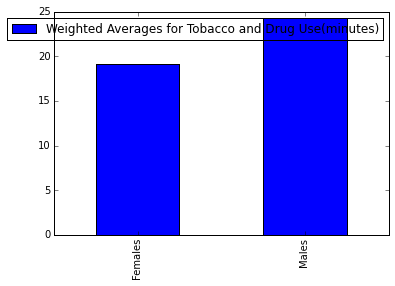

In [33]:
male_female_averages = [average_female_tobacco, average_male_tobacco]
index2 = ['Females', 'Males']
male_female = pd.Series(male_female_averages, index=index2)
male_female.name = 'Weighted Averages for Tobacco and Drug Use(minutes)'
male_female_data_frame = male_female.to_frame()
male_female_data_frame.plot(kind='bar')


This bar graph shows the weighted averages for tobacco and drug use for both male and females.  Males had an average of 24.32 minutes of tobacco and drug use per day. Females had an average of 19.15 minutes of tobacco and drug use per day. Based on this group of respondents, males spent more of their time a day using tobacco and drugs than females(approx. 5 more minutes).

#These graphs were me having extra practice with a few things. 

In [34]:
male = sorted_men_women.Gender == 1
males_thirty_or_less = sorted_men_women.Age < 30
tobacco_use = sorted_men_women.Tobacco__Drug_Use > 0
males_tobacco = sorted_men_women[male & males_thirty_or_less & tobacco_use]
males_tobacco.head()

,Gender,Weight,Tobacco__Drug_Use,Age,Weighted_Minutes
3115,1,15356095.413936,15,27,2.303414e+08
5416,1,6255335.614635,10,25,6.255336e+07
3276,1,20140215.418420,30,24,6.042065e+08
3807,1,4962215.244717,20,23,9.924430e+07
8416,1,37800691.625648,16,23,6.048111e+08


,Gender,Weight,Tobacco__Drug_Use,Age,Weighted_Minutes
count,11,11.000000,11.000000,11.000000,1.100000e+01
mean,1,15012213.160972,24.909091,23.545455,2.818991e+08
std,0,9918328.954370,26.334216,3.173756,2.099023e+08
min,1,4573647.022275,5.000000,18.000000,6.255336e+07
25%,1,8041813.680120,12.500000,22.500000,1.092693e+08
50%,1,11950398.607941,16.000000,23.000000,1.965658e+08
75%,1,20540831.202223,25.000000,26.000000,4.631167e+08
max,1,37800691.625648,98.000000,28.000000,6.048111e+08


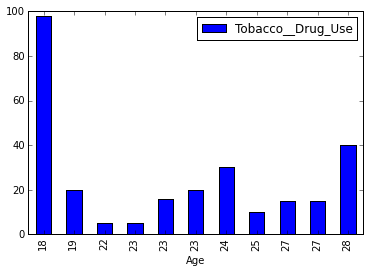

In [606]:
sorted_males = males_tobacco.sort_index(ascending=True, by='Age')
sorted_males.plot(kind='bar', x='Age', y='Tobacco__Drug_Use')
sorted_males.describe()

In [35]:
older_men = sorted_men_women.Gender == 1
males_greater_than_thirty = sorted_men_women.Age > 30
tobacco_usage = sorted_men_women.Tobacco__Drug_Use > 0
older_men_tobacco = sorted_men_women[older_men & males_greater_than_thirty & tobacco_usage]
older_men_tobacco.head()

,Gender,Weight,Tobacco__Drug_Use,Age,Weighted_Minutes
4203,1,2294518.311576,90,80,2.065066e+08
780,1,3315154.212265,2,56,6.630308e+06
9268,1,8955189.380733,10,43,8.955189e+07
2897,1,2754025.869296,25,43,6.885065e+07
5608,1,5028766.282474,10,42,5.028766e+07
